# Методы обучения с учителем

Концепция "обучения с учителем" (Supervised Learning) в теории искусственного интеллекта и, в частности, в машинном обучении реализует естественный и понятный механизм обучения системы (биологической или технической) на основе передачи знаний от учителя к ученику в виде конкретных примеров "стимул-реакция".

Непосредственно в задаче машинного обучения данный подход подразумевает настройку параметров некоторой модели, реализующей, например, правило классификации или регрессии при обучении на примерах, представленными в виде набора входных сигналов (стимулов) и выходных (реакции). Т.е. набор данных при обучении с учителем подразумевает разделение на входные параметры $X$ - обычно свойства объектов, процессов, и выходные параметры $Y$ - правильный ответ системы $Y(X)$ 

### Алгоритм k ближайших соседей (K Nearest Neighbours - KNN)

Данный алгоритм решает **задачу классификации** произвольного объекта по принципу "ты есть то, чем являются твои соседи" (большинство соседей).

В основе алгоритма (как и большинства алгоритмов классификации) лежит **"гипотеза компактности"**, заключающая в предположении, что объекты, принаждежащие оному классу формируют компактные множества в пространстве признаков.


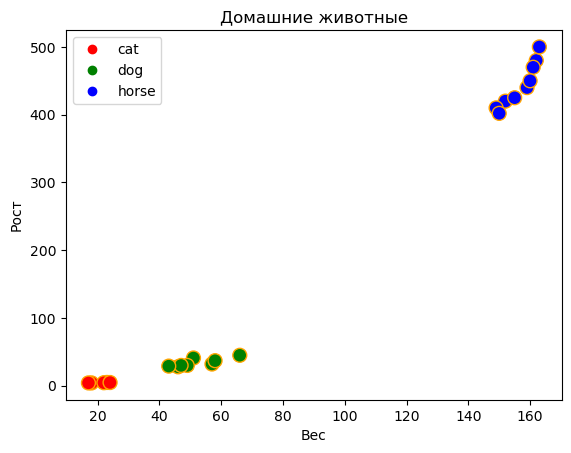

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

animals = pd.DataFrame({"weight": [32.1, 4.2, 4.9, 4.5, 45, 37, 41, 4.2, 420, 410, 425, 4.8, 30, 402, 28, 30, 29, 480, 500, 440, 470, 450 ], 
                        "height": [57, 18, 23, 22, 66, 58, 51, 17, 152, 149, 155, 24, 49, 150, 46, 47, 43, 162, 163, 159, 161, 160], 
                        "class": ["dog","cat","cat","cat","dog","dog","dog","cat","horse", "horse","horse", "cat", "dog", "horse","dog","dog","dog","horse","horse","horse","horse","horse" ]})
ordEnc = OrdinalEncoder()
animals["classEnc"] = ordEnc.fit_transform(animals[["class"]]).astype(int)
scat = plt.scatter(x = animals.height, y = animals.weight, c = animals.classEnc, cmap = ListedColormap(["red", "green", "blue"]), edgecolors = "orange", s = 100)
plt.xlabel("Вес")
plt.ylabel("Рост")
plt.title("Домашние животные")
plt.legend(handles=scat.legend_elements()[0], labels = list(ordEnc.categories_[0]))
plt.show()

Как можно видеть, объекты, в большинстве принадлежащие одному классу, имеют схожие свойства и поэтому образуют группы точек, близких друг к другу в пространстве признаков, при этом достаточно отстоящих от других групп. 

Но здесь так же могут быть исключения: некоторые породы собак по параметрам "рост" и "вес" неотличимы от кошек. Однако, это скорее, изъян постановки задачи и выбора пространства признаков, нежели самой гипеотезы компактности.


#### Рассмотрим наглядный пример работы метода на искусственом наборе данных

Сгенерируем 3 кучки точек (нормальным распределением) и наглядно рассмотрим работу улгоритма: 

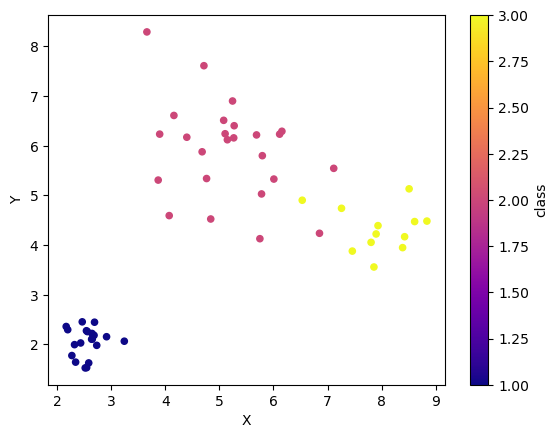

In [3]:

#первая кучка вокруг точки (2.5, 2)
x1 = np.random.normal(2.5, 0.3, 20)
y1 = np.random.normal(2.0, 0.3, 20)
dat = pd.DataFrame({"X": x1, "Y": y1, "class": 1})

#вторая кучка вокруг точки (5, 6)
x2 = np.random.normal(5.0, 1.0, 25)
y2 = np.random.normal(6.0, 1.0, 25)
add = pd.DataFrame({"X": x2, "Y": y2, "class": 2})
dat = pd.concat([dat, add], ignore_index = True)

#третья кучка вокруг точки (8, 4)
x3 = np.random.normal(8.0, .7, 12)
y3 = np.random.normal(4.0, .6, 12)
add = pd.DataFrame({"X": x3, "Y": y3, "class": 3})
dat = pd.concat([dat, add], ignore_index = True)

#dat.groupby(by = "class").agg([np.mean, np.std])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.show()


Задача состоит в определении, какому классу будет относиться новая произвольная точка, не входящая в исходный набор данных (*обучающую выборку*)


Координаты тестовой точки: [7.61667464 7.78286673]


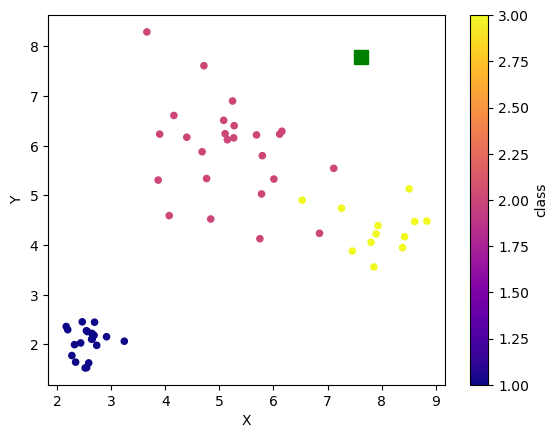

In [15]:
arbitrX = np.random.uniform(0,10,2)
#arbitrX = np.array([[6.5,5]])
print(f"Координаты тестовой точки: {arbitrX}")

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0], arbitrX[1], "gs", markersize = 10)
plt.show()

К какому классу отнести эту точку?

### KNeighborsClassifier (библиотека sklearn)

Методы биб-ки **sklearn** используют данные типа **numpy.array**

Если используем датасет **Pandas**, то необходимо преобразовать данные методом *to_numpy()*


Каждый объект в задаче машинного обучения представляет собой объединение свойств - объединение столбцов таблицы

Также важно следить за размерностями массивов

In [16]:
dat.head()

,X,Y,class
0,2.913644,2.155083,1
1,2.649766,2.109055,1
2,2.195492,2.296672,1
3,2.272357,1.775964,1
4,2.731929,1.981673,1


In [17]:
knnX = dat[["X","Y"]].to_numpy()
knnY = dat[["class"]].to_numpy()
print(knnX.shape)
print(knnY.shape)

(57, 2)
(57, 1)


Выходную переменную (метки классов) нужно преобразовать к одномерной структуре

Значение -1 в каком-либо измерении функции *reshape()* указывает на автоматический подсчет кол-ва элементов. В данном случае это аналогично *reshape(57)*

Тестовые данные требуется привести к форме обучающих данных. Для тестовой точки вызов *reshape(1,-1)* означает приведение массива [testx, testY] к двумерному виду [[testx, testY]], т.е. по первому измерению 1 элемент - сам массив с координатами точки, а по второму измерению -1 означает автоматический подбор по количеству координат (аналогично *reshape(1,2)*)

In [18]:
knnY = knnY.reshape(-1)
print(f"Y shape: {knnY.shape}")
arbitrX = arbitrX.reshape(1,-1)
print(f"Test X shape: {arbitrX.shape}")

Y shape: (57,)
Test X shape: (1, 2)


Предсказаный класс точки: [2]
3 ближайших соседей:
[[[6.15639283 6.29283048]
  [6.11424097 6.23428993]
  [7.11457327 5.54611296]]]


F:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


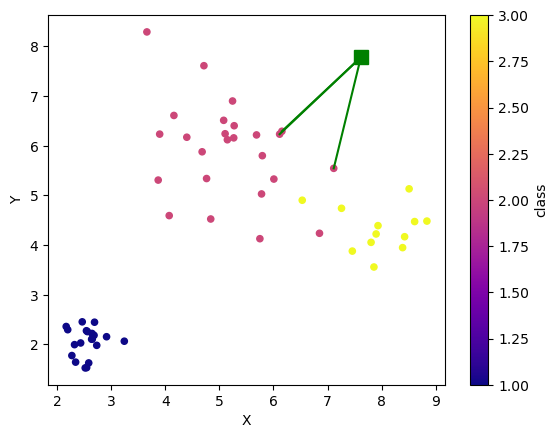

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neighborCount = 3
knn = KNeighborsClassifier(n_neighbors = neighborCount)
knn.fit(knnX , knnY)

prediction = knn.predict( arbitrX )
print(f"Предсказаный класс точки: {prediction}")
neighborsIndex = knn.kneighbors(X = arbitrX, n_neighbors = neighborCount, return_distance = False)
print(f"{neighborCount} ближайших соседей:")
print(knnX[neighborsIndex])

dat.plot.scatter(x="X", y="Y", c="class", colormap="plasma")
plt.plot(arbitrX[0][0], arbitrX[0][1], "gs", markersize = 10)
for idx in neighborsIndex[0]:
    lineX = [arbitrX[0][0], knnX[idx][0]]
    lineY = [arbitrX[0][1], knnX[idx][1]]
    plt.plot( lineX, lineY, "g-" )
plt.show()

#### Насколько адекватно и корректно работает данная модель? Как проверить на известных данных?

В задачах машинного обучения помимо процедуры **обучения на данных**, выполняется процедура **проверки на тестовых данных**

Имеющийся набор данных, если не предоставляет готовое разбиение на обучающую и тестовую выборки (например MNIST), разбивают на **обучающую выборку** и **тестовую выборку**. 

Разбиение обычно выполняется в пропорциях 80% / 20%, 75% / 25% - большая часть примеров, очевидно, идет на обучение. При этом разбиения должны быть сбалансированы по количеству примеров каждого из классов. 

Для выборок независимых друг от друга объектов/наблюдений обычно делается случайная равномерная выборка.

Для временных рядов (когда считаем, что наблюдение в момент t зависит от предыдущих t-1, t-2,... наблюдений ) случайный сэмплинг недопустим. В этом случае берутся "непрерывные" интервалы или скользящие окна.

### train_test_split

In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()

Для использования методов, использующих метрику, необходимо произвести нормализацию значений признаков

In [23]:
vMin = iris.data.min( axis = 0 )
x = (iris.data - vMin) / (iris.data.max( axis = 0 ) - vMin)

Разделим выборку на обучающую и тестовую 

In [24]:
xTrain, xTest, yTrain, yTest = train_test_split(x, iris.target, test_size = 0.33, shuffle = True)

In [36]:
irisKnn = KNeighborsClassifier(n_neighbors = 3)
irisKnn.fit(xTrain, yTrain)
yPred = irisKnn.predict(xTest)
yPred

F:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 1, 2])

In [37]:
yTest

array([2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 1, 2])

In [49]:
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred, return_counts=True)
print(f"Кол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

Кол-во меток классов в тестовой: [11 22 17],
Кол-во меток классо в предсказании: [11 21 18]


Сопоставление результатов предсказания с фактическими метками - **Confusion Matrix** (матрица ошибок)

### Confusion Matrix

In [55]:
conMat = confusion_matrix(yTest, yPred )
conMat

array([[11,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 17]], dtype=int64)

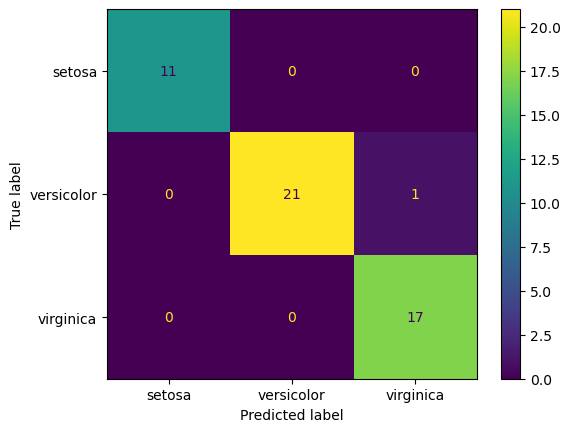

In [58]:
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat, display_labels = iris.target_names)
cmDisp.plot()
plt.show()

TP - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FP - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу (по горизонтали кроме диагонали)

TN - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)

FN - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса (по вертикали кроме диагонали)

Recall: $R = \frac{TP}{TP + FN}$ 

Precision: $P = \frac{TP}{TP + FP}$

Accuracy: $A = \frac{TP + TN}{Total values}$

F1-мера: $F1 = \frac{2 \cdot Recall \cdot Accuracy}{Recall + Accuracy}$

Recall для метки "1": $R_1 = \frac{21}{21 + 1} = 0.95$ (1 метка ложно-отрицательная FN, ложно исключили из класса)

Precision для метки "1": $P_1 = \frac{21}{21 + 0} = 1$ (нет ложно-положительных меток, нет ошибочно принятых в класс "1")

Precision для метки "2": $P_2 = \frac{17}{17 + 1} = 0.94$ (1 метка ложно-положительная FP, ложно приняли в класс)

In [47]:

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.95      0.98        22
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Задача регресии (K ближайших соседей)

Задача регрессии заключается в предсказании значения зависимой (целевой) переменной. Метод k ближайших соседей аналогично ищет наиболее близкие в смысле заданной метрики объекты в пространстве признаков, а затем интерполирует значения их зависимого целевого параметра (аналогично выбору класса большинства ближайших соседей)

### KNeighborsRegressor (библиотека sklearn)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston

boston = load_boston()


F:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(boston.data)


In [69]:
bosXTrain, bosXTest, bosYTrain, bosYTest = train_test_split(x, boston.target, test_size = 0.25)

In [76]:
bostonRegr = KNeighborsRegressor(n_neighbors=5)
bostonRegr.fit(bosXTrain, bosYTrain)
bosYPred = bostonRegr.predict(bosXTest)

In [77]:
bosYPred

array([15.76, 16.68, 19.02, 11.14, 19.62, 13.18, 29.84, 12.62, 27.58,
       22.36, 18.86, 28.12,  9.6 , 34.68, 37.86, 22.1 , 18.1 , 21.78,
       11.6 , 39.26, 19.06, 21.38, 19.82,  9.82, 20.66, 22.16, 26.58,
       19.38, 18.46, 21.26, 29.04, 15.12, 25.12, 19.38, 22.82, 28.58,
       22.44, 24.82, 13.98, 14.32, 24.4 , 23.62, 11.62, 19.52, 33.74,
       22.08, 33.74, 22.22, 33.22, 22.26, 28.24, 32.24, 23.76, 18.38,
       21.98, 12.86, 23.3 , 26.34, 18.88, 19.24, 32.04, 13.26, 18.3 ,
       10.48, 21.74, 13.74, 20.04, 21.48, 29.82, 22.72, 12.1 , 13.06,
       44.48, 21.4 , 19.16, 21.14, 18.1 , 32.68, 15.62, 19.84, 27.52,
       19.12, 31.12, 13.06, 43.26, 24.98, 25.9 , 30.84, 21.04, 32.46,
       19.98, 22.22, 17.82, 23.68, 25.98, 23.36, 16.24, 27.9 , 16.96,
       12.36, 29.62, 19.38, 20.14, 21.92, 20.2 , 21.98, 27.68, 18.1 ,
       19.82, 13.34, 23.84, 26.34, 23.66, 20.42, 24.46, 19.36, 24.88,
        8.46, 25.48, 19.64, 13.18, 31.04, 19.82, 19.98, 14.42, 25.34,
       17.42])

In [78]:
bosYTest

array([14.2, 15.6, 18.8, 13.8, 25. , 10.9, 35.4,  8.1, 26.6, 23.2, 16.5,
       31.1, 16.3, 29.8, 33.2, 20.5, 17.8, 19.6,  9.6, 43.5, 20.4, 21.7,
       19.5, 10.2, 11.9, 19.3, 26.4, 19.2, 18.5, 22.2, 27.9, 18.6, 23.7,
       18. , 25. , 29.4, 24.1, 23. , 11.7, 16.7, 22.9, 28.1,  9.7, 17.4,
       36.5, 16.6, 36. , 21.2, 32.9, 19.6, 22.8, 50. , 25. , 18.2, 22.2,
       14.4, 24.1, 30.1, 19.7, 17.8, 50. , 14.1, 18.4,  7.2, 19.3, 27.5,
       19.9, 21.2, 50. , 21.2, 13.4, 12.1, 44. , 23.4, 20.2, 20.6, 11.8,
       30.5, 12.6, 20.3, 22. , 16.8, 34.9, 13.3, 44.8, 23.3, 23.1, 31.7,
       19.8, 32.2, 17.3, 20.8, 21.9, 23.8, 26.4, 24.3, 13.8, 41.3, 17.4,
        7.5, 28.5, 17.1, 20.6, 22.1, 21.2, 23. , 24.8, 15.6, 19.4, 11.7,
       22.8, 25.2, 22.9, 17.1, 22. , 20.8, 24.8, 10.4, 23.9, 19. , 13.9,
       31.2, 20. , 18.8, 16.1, 23.7, 14.5])

In [85]:
np.c_[bosYPred, bosYTest]

array([[15.76, 14.2 ],
       [16.68, 15.6 ],
       [19.02, 18.8 ],
       [11.14, 13.8 ],
       [19.62, 25.  ],
       [13.18, 10.9 ],
       [29.84, 35.4 ],
       [12.62,  8.1 ],
       [27.58, 26.6 ],
       [22.36, 23.2 ],
       [18.86, 16.5 ],
       [28.12, 31.1 ],
       [ 9.6 , 16.3 ],
       [34.68, 29.8 ],
       [37.86, 33.2 ],
       [22.1 , 20.5 ],
       [18.1 , 17.8 ],
       [21.78, 19.6 ],
       [11.6 ,  9.6 ],
       [39.26, 43.5 ],
       [19.06, 20.4 ],
       [21.38, 21.7 ],
       [19.82, 19.5 ],
       [ 9.82, 10.2 ],
       [20.66, 11.9 ],
       [22.16, 19.3 ],
       [26.58, 26.4 ],
       [19.38, 19.2 ],
       [18.46, 18.5 ],
       [21.26, 22.2 ],
       [29.04, 27.9 ],
       [15.12, 18.6 ],
       [25.12, 23.7 ],
       [19.38, 18.  ],
       [22.82, 25.  ],
       [28.58, 29.4 ],
       [22.44, 24.1 ],
       [24.82, 23.  ],
       [13.98, 11.7 ],
       [14.32, 16.7 ],
       [24.4 , 22.9 ],
       [23.62, 28.1 ],
       [11.62,  9.7 ],
       [19.

Метод *score* вычисляет коэффициент детерминации $R^2$ - доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью, т.е. насколько хорошо полученная модель соответствует реальным данным (чем ближе к 1, тем лучше)

In [88]:
#коэффициент детерминации R^2:
rsq = bostonRegr.score(bosXTest, bosYTest)
rsq

0.7631397733164084

In [89]:
mse = ((bosYPred - bosYTest)**2).mean()
mae = np.abs(bosYPred - bosYTest).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

MSE: 17.177508661417328, MAE: 2.4785826771653547, R2: 0.7631397733164084


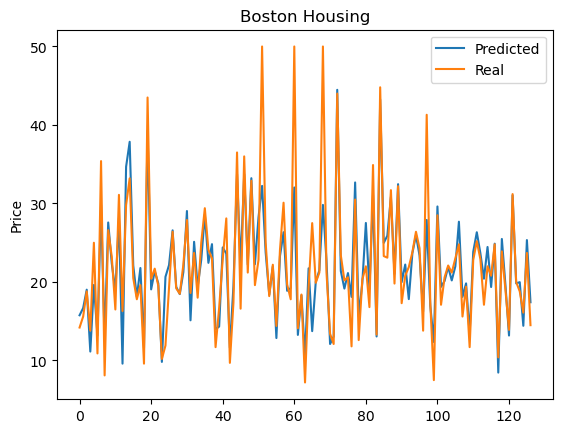

In [79]:
plt.plot(bosYPred)
plt.plot(bosYTest)
plt.legend(["Predicted", "Real"])
plt.ylabel("Price")
plt.title("Boston Housing")
plt.show()